In [1]:
import os
import cv2 as cv
import numpy as np
import ipynb.fs.defs.Utils as Utils
import ipynb.fs.defs.GraphBuilding as GraphBuilding
import ipynb.fs.defs.BasicStitching as BasicStitching
import ipynb.fs.defs.SimpleGraphStitching as SimpleGraphStitching
import ipynb.fs.defs.MultiGraphStitching as MultiGraphStitching

In [2]:
#Directories
dataset_name = 'mountain_dataset'
dataset_dir = f'datasets/{dataset_name}'
output_dir ="output"
stitching_dir = "stitched"
partial_results_dir = "partial"

In [3]:
M_filename = f"M_{dataset_name}.npy"
C_filename = f"C_{dataset_name}.npy"
Z_filename = f"Z_{dataset_name}.npy"
Adj_filename = f"Adj_{dataset_name}.npy"
Weight_filename = f"W_{dataset_name}.npy"

In [4]:
#global variables
save_output = True
save_images = True
output_dir ="output"
results_dir = "results"
verbose = False
noisy_matching = False

In [5]:
#simple graph parameters
simple_matching_threshold = 0.7
simple_matches_th = 20
simple_RANSACmaxIters = 1000
load_simple_matrices = False

In [6]:
#multi graph parameters
multi_matching_threshold = 0.7
multi_number_of_matches = 10
multi_matches_th = 20
multi_RANSACmaxIters = 1000
load_multi_matrices = False

In [7]:
#generalstitching parameters
automatic_idx_computation = True
idx_ref = 0
idxs = None
beautify = True

In [8]:
#basic stitching parameters
basic_warp_shape = [2000,2000]
basic_stitching_dir = "basic_stitching"

In [9]:
#simple graph stitching parameters
simple_graph_stitching_dir = "simple_graph"
simple_graph_warp_shape = [10000,10000]

In [10]:
#multigraph stitching parameters
multi_graph_stitching_dir = "multi_graph"
multi_graph_warp_shape = [10000,10000]

In [11]:
#Load images from the folder
imgs = Utils.load_images_from_folder(dataset_dir)

In [12]:
#compute normalization matrices
T_norm = Utils.get_normalization_matrix(imgs)

In [13]:
#verify if single graph matrices are already computed, otherwise compute them
imgs_copy = [np.copy(i) for i in imgs]
if (os.path.isfile(os.path.join(output_dir, M_filename)) and load_simple_matrices):
    M = np.load(os.path.join(output_dir,M_filename))
    C = np.load(os.path.join(output_dir,C_filename))
    Z = np.load(os.path.join(output_dir,Z_filename))
    adj_matrix = np.load(os.path.join(output_dir,Adj_filename))
    weight_matrix = np.load(os.path.join(output_dir,Weight_filename))
else:
    M, Z, C, adj_matrix, weight_matrix = GraphBuilding.build_graph_matrices(dataset_name,
                imgs_copy,
                T_norm,
                matching_threshold = simple_matching_threshold,
                number_of_matches=1,
                matches_th = simple_matches_th ,
                RANSACmaxIters = simple_RANSACmaxIters,
                save_output = save_output,
                save_images = save_images,
                output_dir = output_dir,
                results_dir = results_dir,
                noisy_matching = noisy_matching,
                verbose = verbose)

In [14]:
if automatic_idx_computation:
    idx_ref = Utils.get_reference_node(adj_matrix)

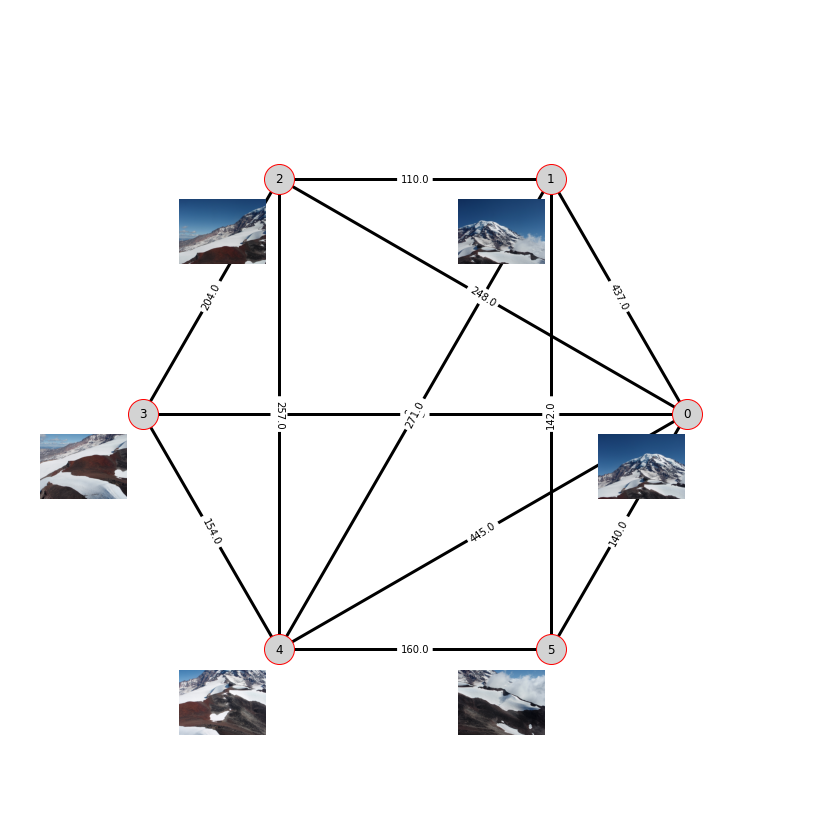

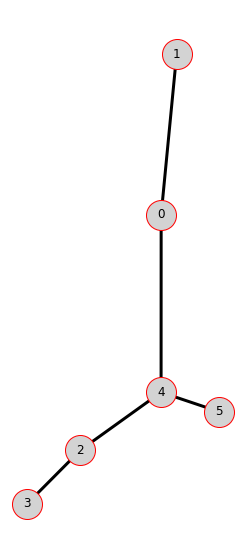

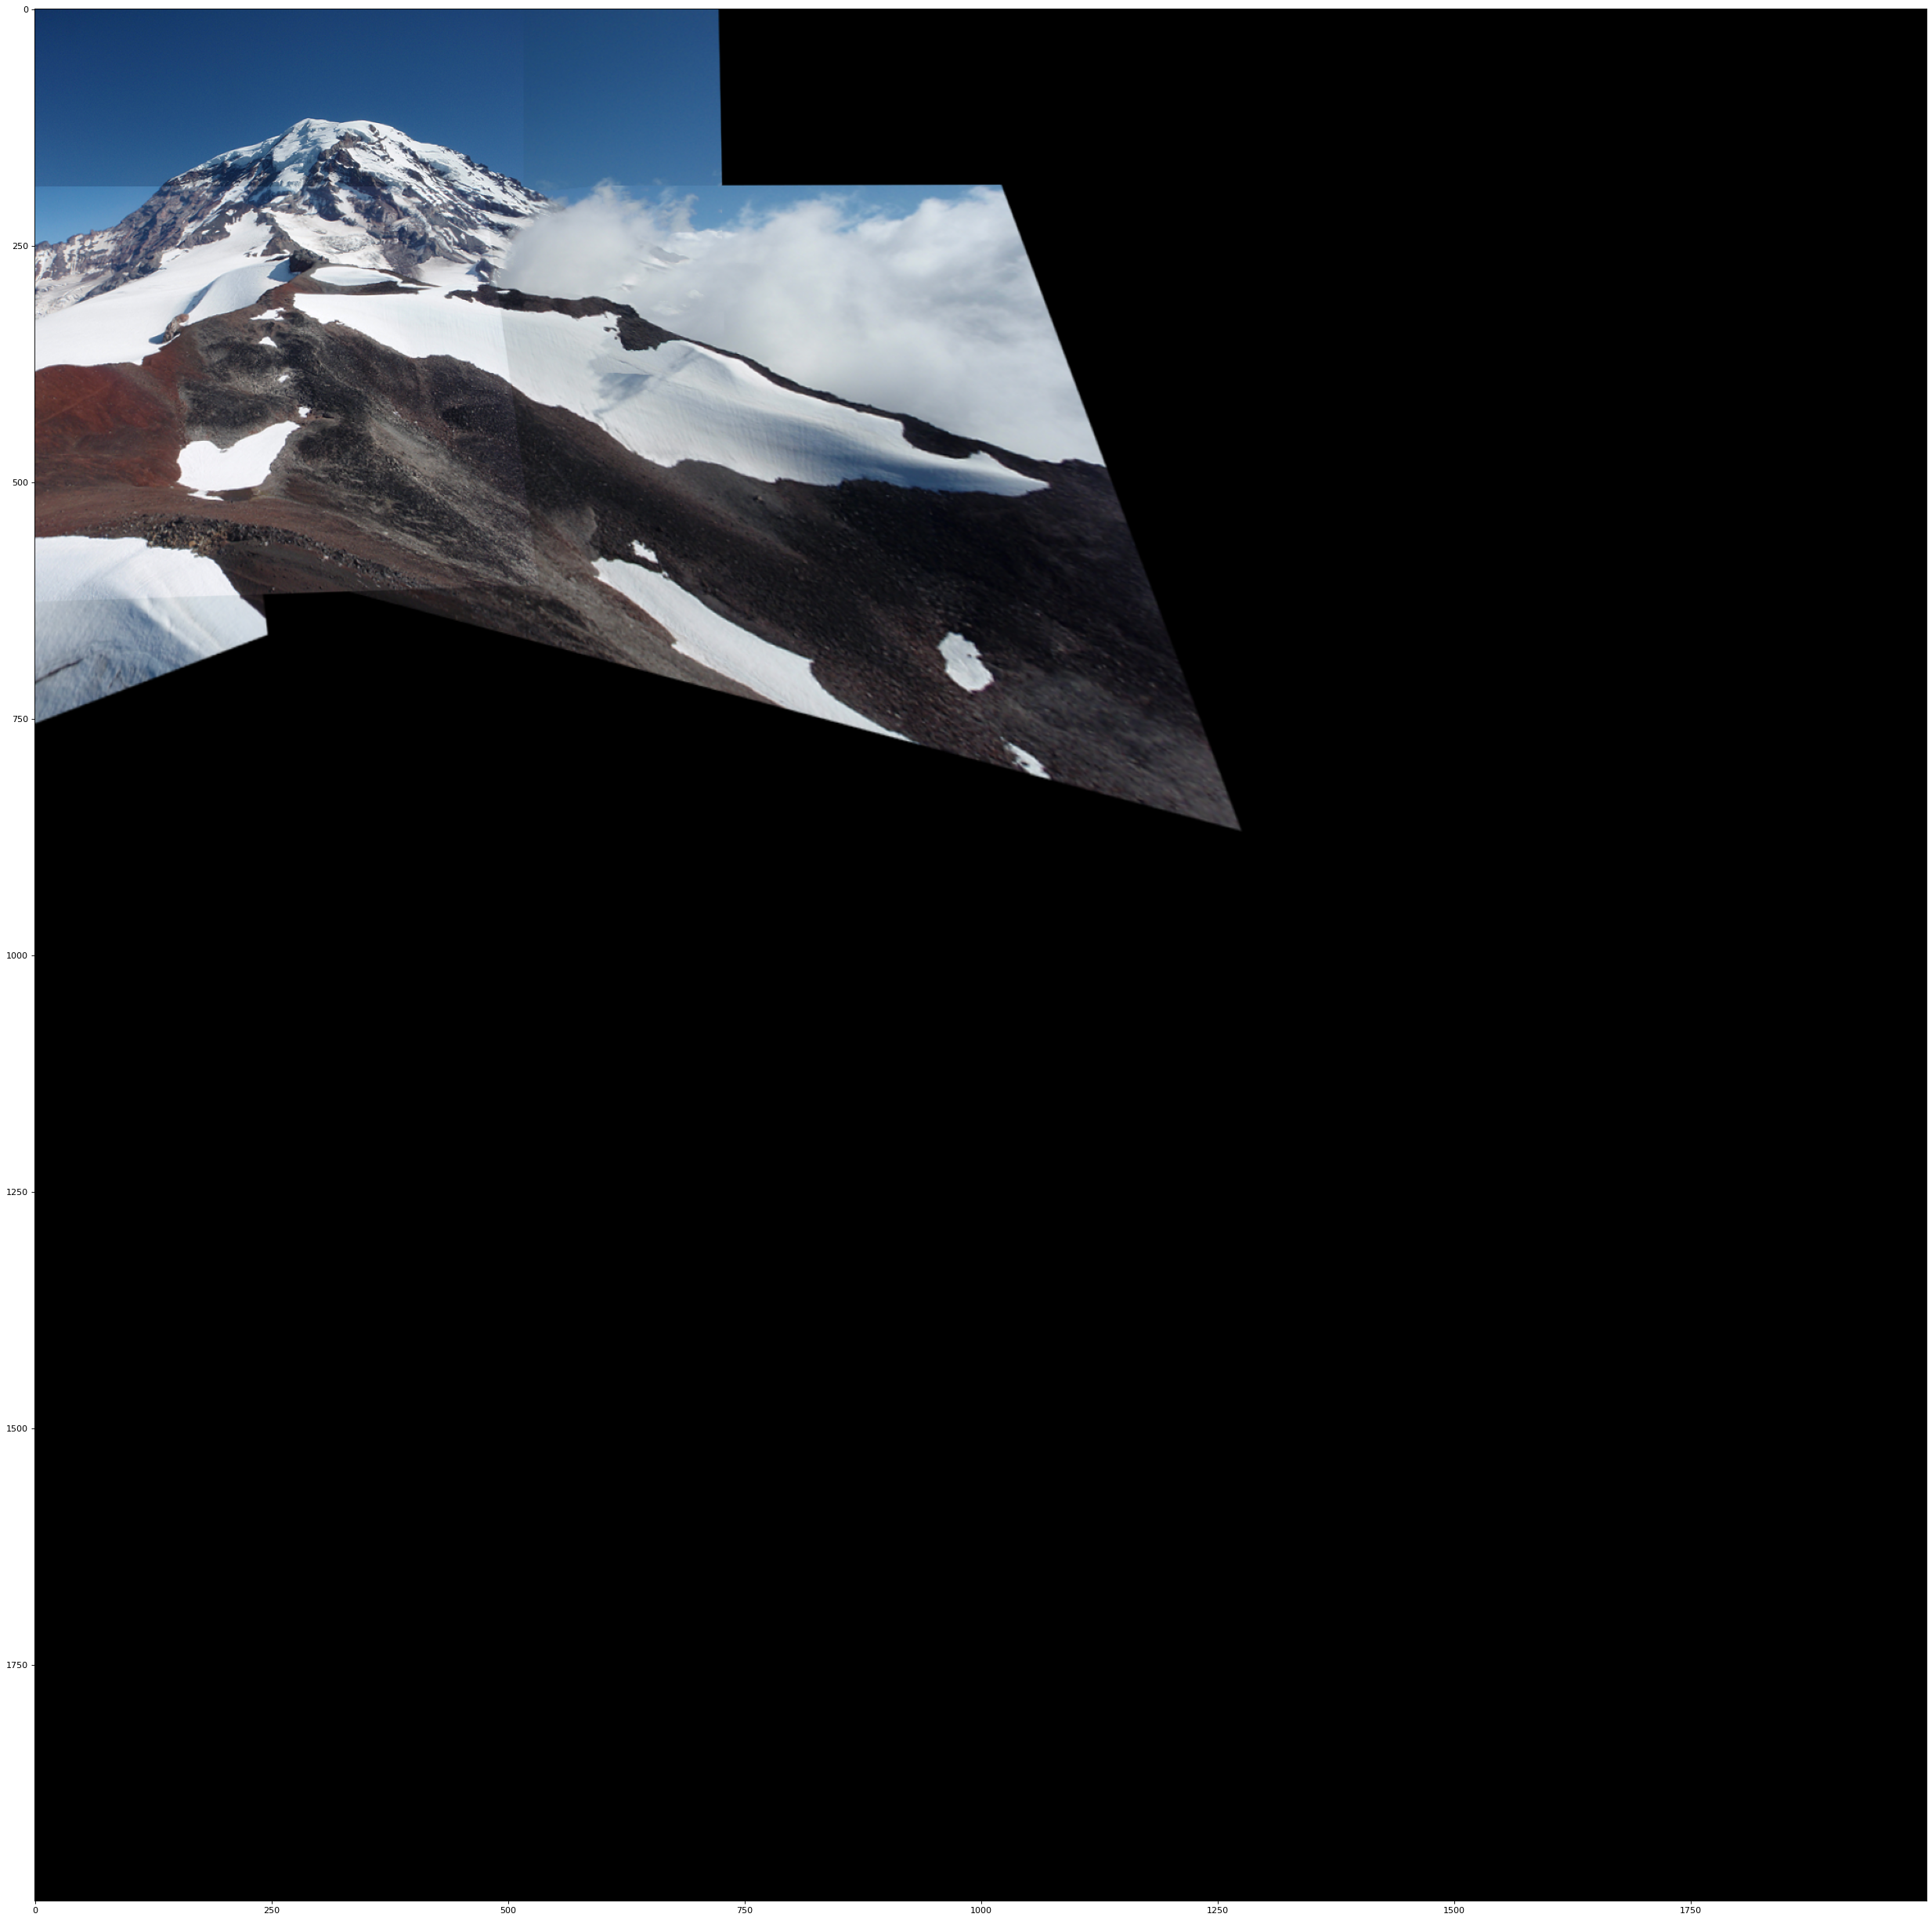

In [15]:
#basic stitching without synchronization
basic_stitched_image = BasicStitching.basic_stitching(dataset_name,
                    imgs,
                    T_norm,
                    Z, 
                    adj_matrix, 
                    weight_matrix,
                    idx_ref = idx_ref,
                    verbose = verbose,
                    save_output = save_output,
                    stitching_dir = stitching_dir,
                    partial_results_dir = partial_results_dir,
                    basic_stitching_dir = basic_stitching_dir,
                    warp_shape = basic_warp_shape
                   )

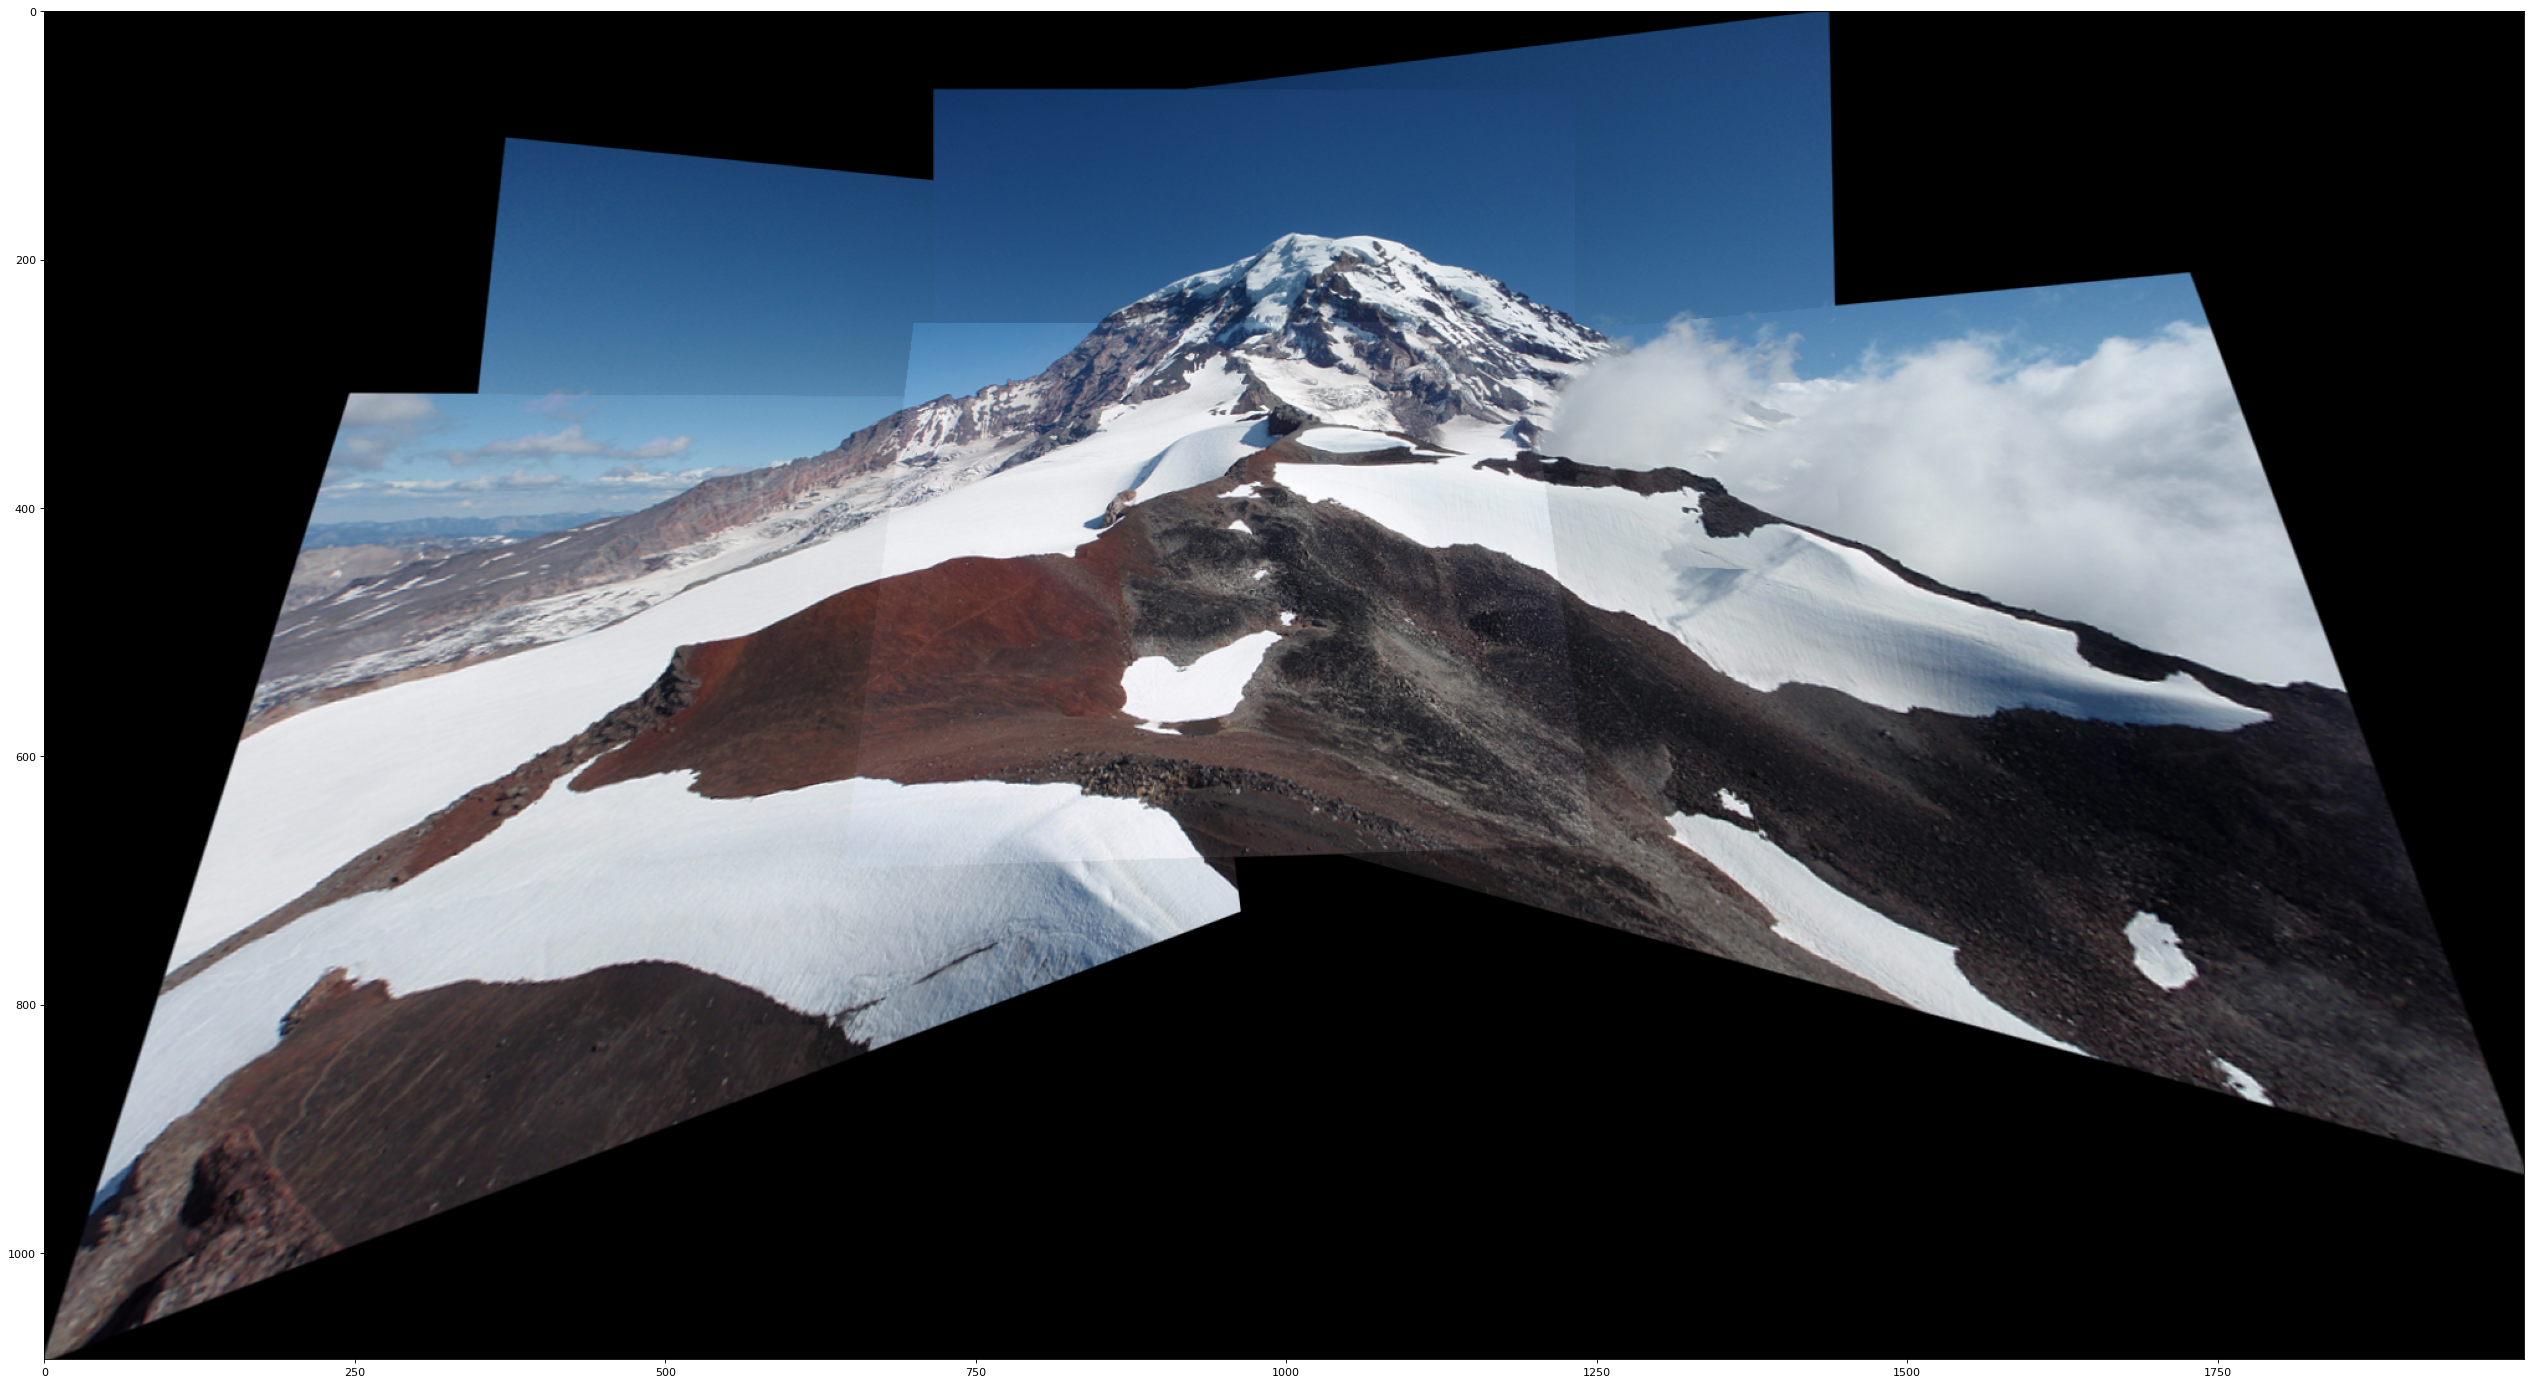

In [16]:
H_simple_graph, simple_graph_stitched_image = SimpleGraphStitching.simple_graph_stitching(dataset_name,
                            imgs,
                            T_norm,
                            M, 
                            idx_ref = idx_ref,
                            idxs = idxs,
                            verbose = verbose,
                            save_output = save_output,
                            beautify = beautify,
                            stitching_dir = stitching_dir,
                            graph_stitching_dir = simple_graph_stitching_dir,
                            warp_shape = simple_graph_warp_shape )

In [17]:
#verify if multi graph matrices are already computed, otherwise compute them
imgs_copy = [np.copy(i) for i in imgs]
if (os.path.isfile(os.path.join(output_dir, M_filename)) and load_multi_matrices):
    M = np.load(os.path.join(output_dir,M_filename))
    C = np.load(os.path.join(output_dir,C_filename))
    Z = np.load(os.path.join(output_dir,Z_filename))
    adj_matrix = np.load(os.path.join(output_dir,Adj_filename))
    weight_matrix = np.load(os.path.join(output_dir,Weight_filename))
else:
    M, Z, C, adj_matrix, weight_matrix = GraphBuilding.build_graph_matrices(dataset_name,
                imgs_copy,
                T_norm,
                matching_threshold = multi_matching_threshold,
                number_of_matches=multi_number_of_matches,
                matches_th = multi_matches_th ,
                RANSACmaxIters = multi_RANSACmaxIters,
                save_output = save_output,
                save_images = save_images,
                output_dir = output_dir,
                results_dir = results_dir,
                noisy_matching = noisy_matching,
                verbose = verbose)

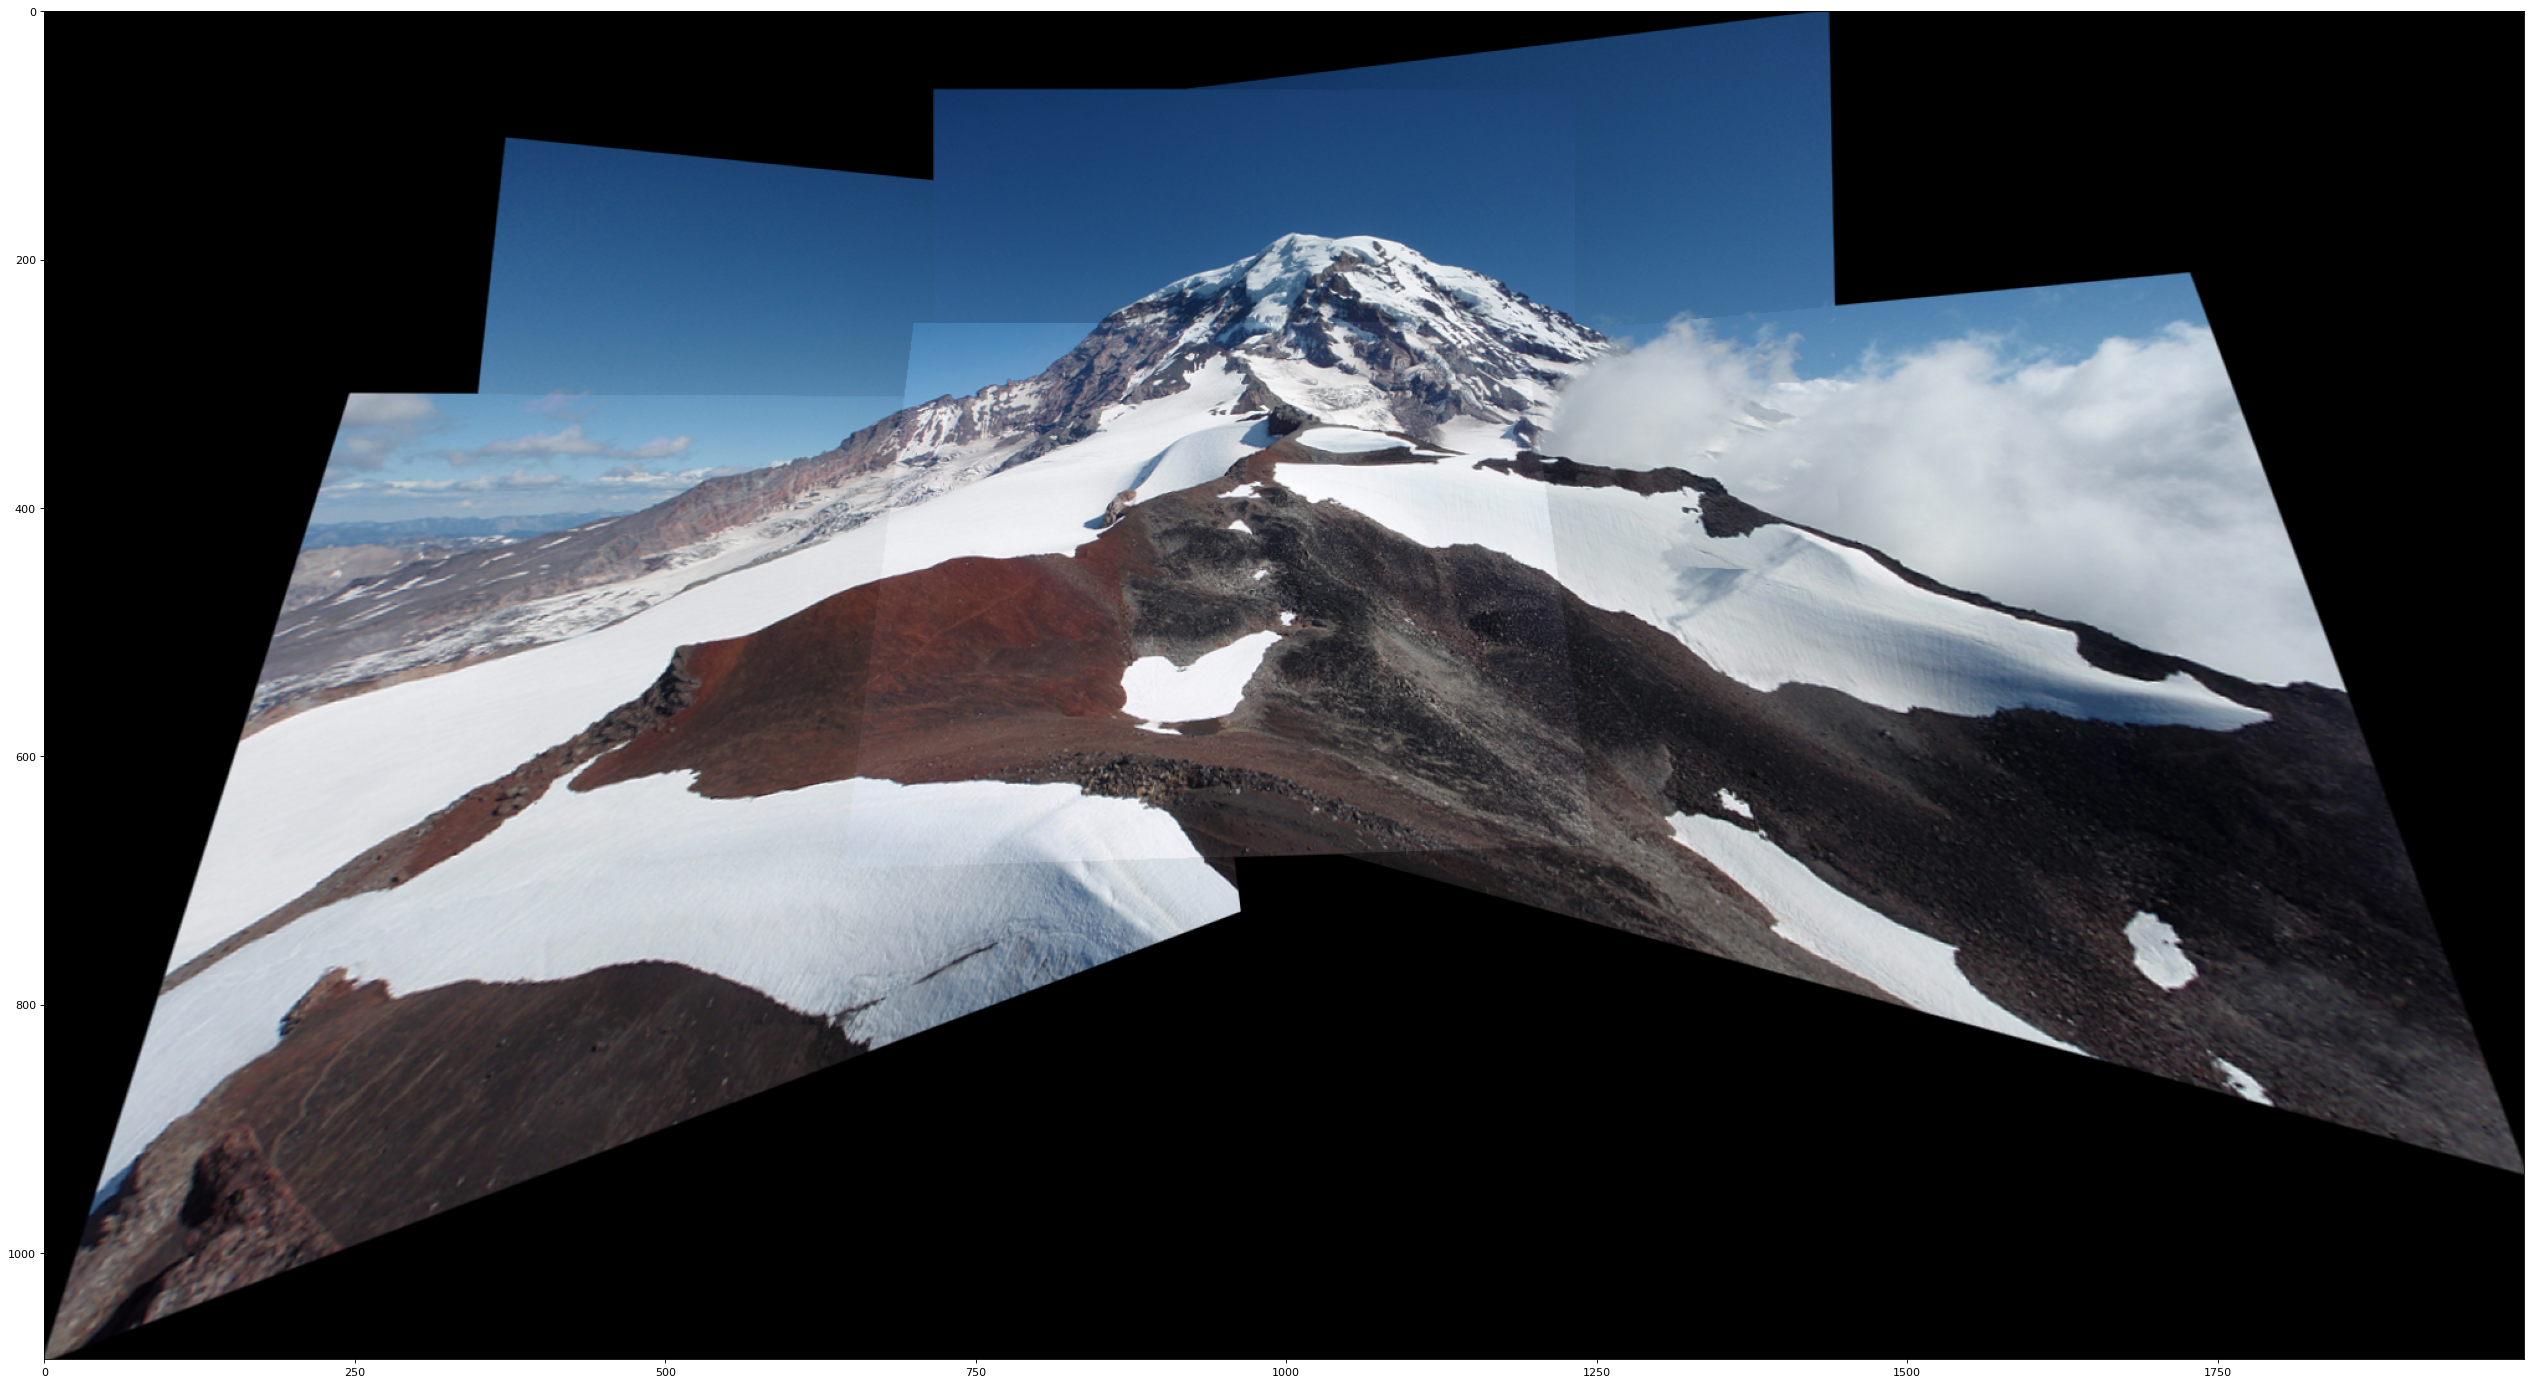

In [18]:
H_multi_graph, multi_graph_stitched_image = MultiGraphStitching.multi_graph_stitching(dataset_name,
                            imgs,
                            T_norm,
                            M, 
                            C,
                            idx_ref = idx_ref,
                            idxs = idxs,
                            verbose = verbose,
                            save_output = save_output,
                            beautify = beautify,
                            stitching_dir = stitching_dir,
                            graph_stitching_dir = multi_graph_stitching_dir,
                            warp_shape = multi_graph_warp_shape )